In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [15]:
# 生成線性可分的數據
X, y = make_blobs(n_samples=100, centers=2, random_state=42, cluster_std=1.25)

In [16]:
print(X, type(X), X.shape)
print(y, type(y), y.shape)

[[-3.10816542  8.78221241]
 [ 5.99369289  3.29042225]
 [-3.18967603  9.15293937]
 [ 5.66745404  4.34416091]
 [ 4.92420375  3.60709813]
 [-2.05745312 10.93683184]
 [ 4.98574234  3.00714875]
 [ 2.70154955  2.0588734 ]
 [-2.99933281  7.18489244]
 [-3.55821953  8.62777066]
 [-2.42478737  7.2333509 ]
 [ 3.09369045  0.32259892]
 [-3.09604061  9.69248618]
 [-4.16943018  9.26036267]
 [ 3.78984793  2.26348681]
 [ 3.66081222  1.57059279]
 [ 4.7151666   5.05222232]
 [ 3.30126321  2.5762602 ]
 [ 4.71263973  0.54445681]
 [-2.39449665  6.52982498]
 [ 4.90749602  0.41599621]
 [ 4.39942763  2.35010386]
 [ 5.62866877  0.83643537]
 [ 5.844099    2.48914584]
 [ 4.96473233  2.95044827]
 [-0.5351816   9.97357954]
 [ 4.5435017   2.39960965]
 [-1.49354035 10.70958616]
 [ 5.29230579  2.34440053]
 [ 4.30905779  5.37338114]
 [-2.80188934  8.72161493]
 [-4.35735011  8.11448087]
 [-3.94793959  9.48390865]
 [-0.67713666  8.73206575]
 [-2.07967476  6.81048593]
 [ 5.3734502   4.71123922]
 [ 4.85635499  2.45481641]
 

In [35]:
print(len(np.where(y==0)[0]))

50


In [17]:
# 建立模型
model = Sequential([
    Dense(1, input_dim=2, activation='sigmoid')
])

# 編譯模型
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [18]:

# 訓練模
model.fit(X, y, epochs=100, verbose=1)

Epoch 1/100


4/4 [==============================] - 0s 10ms/step - loss: 4.9448 - accuracy: 0.0000e+00
Epoch 2/100
4/4 [==============================] - 0s 9ms/step - loss: 4.9175 - accuracy: 0.0000e+00
Epoch 3/100
4/4 [==============================] - 0s 8ms/step - loss: 4.8907 - accuracy: 0.0000e+00
Epoch 4/100
4/4 [==============================] - 0s 10ms/step - loss: 4.8629 - accuracy: 0.0000e+00
Epoch 5/100
4/4 [==============================] - 0s 10ms/step - loss: 4.8364 - accuracy: 0.0000e+00
Epoch 6/100
4/4 [==============================] - 0s 10ms/step - loss: 4.8092 - accuracy: 0.0000e+00
Epoch 7/100
4/4 [==============================] - 0s 10ms/step - loss: 4.7822 - accuracy: 0.0000e+00
Epoch 8/100
4/4 [==============================] - 0s 9ms/step - loss: 4.7566 - accuracy: 0.0000e+00
Epoch 9/100
4/4 [==============================] - 0s 9ms/step - loss: 4.7310 - accuracy: 0.0000e+00
Epoch 10/100
4/4 [==============================] - 0s 10ms/step - loss: 4.7052 - accuracy: 0.0000

In [22]:
print(type(X[:, 0]), X[:, 0])

<class 'numpy.ndarray'> [-3.10816542  5.99369289 -3.18967603  5.66745404  4.92420375 -2.05745312
  4.98574234  2.70154955 -2.99933281 -3.55821953 -2.42478737  3.09369045
 -3.09604061 -4.16943018  3.78984793  3.66081222  4.7151666   3.30126321
  4.71263973 -2.39449665  4.90749602  4.39942763  5.62866877  5.844099
  4.96473233 -0.5351816   4.5435017  -1.49354035  5.29230579  4.30905779
 -2.80188934 -4.35735011 -3.94793959 -0.67713666 -2.07967476  5.3734502
  4.85635499 -2.09511833 -3.51981463 -2.24811813 -1.5861144   5.65677536
  3.42152675  5.23142587  4.33314369 -0.66183007 -2.55398017 -2.13904728
 -3.89211634  3.15074946  4.6561312  -4.66534491 -3.08846974  5.08711304
 -2.20674478  5.42196302 -2.38785069  4.96181682  3.5279858  -2.05715259
 -2.40038879  4.36055035 -3.17139788  2.24141482  6.08812331  3.53505704
  6.99761121 -4.27841105  2.63052479  4.9529949  -3.08499609  3.40170843
  6.97209698  6.06840735  4.08173515  4.4382717   4.76444304 -2.59921028
  3.49059854 -2.52606915  5.00

In [27]:
model.layers[0].get_weights()

[array([[-0.6496157 ],
        [-0.01658397]], dtype=float32),
 array([-0.01344541], dtype=float32)]

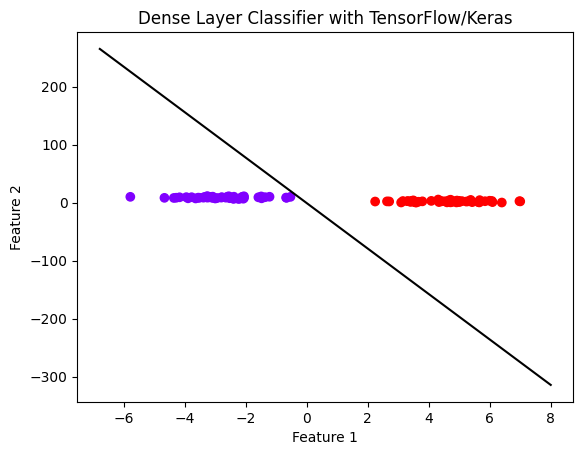

In [36]:
# 視覺化數據及分割線
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='rainbow')

# 繪製分割線
xx = np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1)
weights = model.layers[0].get_weights()
yy = (-weights[0][0] * xx - weights[1]) / weights[0][1]
plt.plot(xx, yy, 'k-')

plt.title("Dense Layer Classifier with TensorFlow/Keras")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()